# Parameters

In [1]:
# Robotermaße
robot_width = 1
robot_length = 6

# Start- und Zielpunkt festlegen
start_point = (6, 1, 0)
goal_point = (10, 1, 0)
current_position=start_point

# Define Occupancy Grid

In [2]:
import numpy as np

def add_obstacle(occupancy_grid, width, length, x, y):
    width_occ_grid = len(occupancy_grid[0])
    height_occ_grid = len(occupancy_grid)

    start_row = y
    end_row = min(height_occ_grid, y + length)
    start_col = x
    end_col = min(width_occ_grid, x + width)

    for row in range(start_row, end_row):
        for col in range(start_col, end_col):
            occupancy_grid[row][col] = False

    return occupancy_grid

def generate_empty_occupancy_grid(size):
    empty_occupancy_grid = np.ones((size, size), dtype=bool)

    return empty_occupancy_grid

In [3]:
# Obstacles
occupancy_grid = generate_empty_occupancy_grid(18)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=3,
    x=8,
    y=4)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=2,
    x=8,
    y=11)

# Plot Occupancy Grid

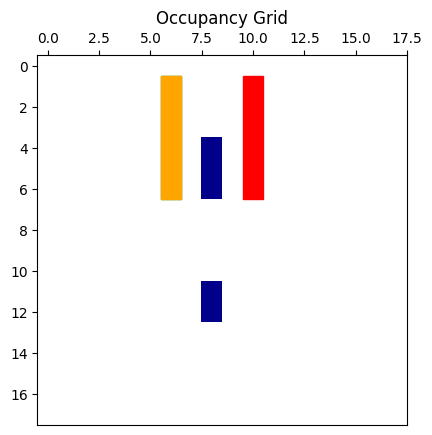

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_occupancy_grid(occupancy_grid, goal_point, plot_axis, current_position=None, path=[], robot_width=None, robot_length=None, active=True, plot_title="Occupancy Grid", y_axis_label=None, start_point=None):
    plot_axis.clear()

    if active:
        cmap = ListedColormap(['darkblue', 'white'])        
        start_color = 'green'
        goal_color = 'red'
        path_color = 'blue'
        current_color = 'orange'
    else:
        cmap = 'gray'
        start_color = 'black'
        goal_color = 'dimgray'
        path_color = 'darkgray'
        current_color = 'gray'
        line_color = 'black'

    plot_axis.imshow(occupancy_grid, cmap=cmap, interpolation='nearest', origin='upper')

    if start_point is not None:
        start_x, start_y, start_rotation = start_point
        if robot_width is None or robot_length is None:
            # Darstellung des aktuellen Roboters als x
            if not occupancy_grid[start_y, start_x]:
                plot_axis.scatter(start_x, start_y, color=start_color, marker='x', label='Start Position')
            else:
                plot_axis.scatter(start_x, start_y, color=start_color, marker='o', label='Start Position')
        else: # Darstellung des aktuellen Roboters als Rechteck
            current_rect = plt.Rectangle(
                (start_x - 0.5, start_y - 0.5),
                robot_width,
                robot_length,
                rotation_point=(start_x, start_y),
                angle=start_rotation * -90,  # Rotation in Grad umrechnen
                color=start_color,
                label='Start Position'
            )
            plot_axis.add_patch(current_rect)


    if goal_point is not None:
        goal_x, goal_y, goal_rotation = goal_point
        if robot_width is None or robot_length is None:
            # Darstellung des aktuellen Roboters als x
            if not occupancy_grid[goal_y, goal_x]:
                plot_axis.scatter(goal_x, goal_y, color=goal_color, marker='x', label='Goal Position')
            else:
                plot_axis.scatter(goal_x, goal_y, color=goal_color, marker='o', label='Goal Position')
        else: # Darstellung des aktuellen Roboters als Rechteck
            current_rect = plt.Rectangle(
                (goal_x - 0.5, goal_y - 0.5),
                robot_width,
                robot_length,
                rotation_point=(goal_x, goal_y),
                angle=goal_rotation * -90,  # Rotation in Grad umrechnen
                color=goal_color,
                label='Start Position'
            )
            plot_axis.add_patch(current_rect)

    plot_axis.plot([p[0] for p in path], [p[1] for p in path], color=path_color, label='Chosen Path')

    if current_position is not None:
        current_x, current_y, current_rotation = current_position
        if robot_width is None or robot_length is None:
            # Darstellung des aktuellen Roboters als x
            if not occupancy_grid[current_y, current_x]:
                plot_axis.scatter(current_x, current_y, color=current_color, marker='x', label='Current Position')
            else:
                plot_axis.scatter(current_x, current_y, color=current_color, marker='o', label='Current Position')
                # Darstellung des aktuellen Roboters als Rechteck
        else:
            current_rect = plt.Rectangle(
                (current_x - 0.5, current_y - 0.5),
                robot_width,
                robot_length,
                rotation_point=(current_x, current_y),
                angle=current_rotation * -90,  # Rotation in Grad umrechnen
                color=current_color,
                label='Current Position'
            )
            plot_axis.add_patch(current_rect)

    plot_axis.grid(False)
    plot_axis.set_title(plot_title)

    # Beschriftung der X-Achse oben
    plot_axis.xaxis.tick_top()

    if y_axis_label is not None:
        # Optionale Beschriftung Y-Achse
        plot_axis.text(-0.15, 0.5, y_axis_label, rotation='horizontal', va='center', ha='right', transform=plot_axis.transAxes)


fig = plt.figure()
plot_axis = fig.add_subplot(111)
plot_occupancy_grid(
    occupancy_grid=occupancy_grid, 
    goal_point=goal_point, 
    current_position=current_position, 
    plot_axis=plot_axis, 
    robot_width=robot_width, 
    robot_length=robot_length,
    start_point=start_point)
plt.show()

# Compute Computational Spaces

In [5]:
def compute_cs_0deg(occupancy_grid, robot_width, robot_length):
    height = len(occupancy_grid)
    width = len(occupancy_grid[0])

    computational_space = np.full((height, width), True)

    for row in range(height):
        for col in range(width):
            if not occupancy_grid[row][col]:
                # Koordinaten im quadratischen Bereich um das Hindernis auf False setzen
                start_row = max(0, row - (robot_length - 1))
                end_row = min(height, row + 1)
                start_col = max(0, col - (robot_width - 1))
                end_col = min(width, col + 1)

                for i in range(start_row, end_row):
                    for j in range(start_col, end_col):
                        computational_space[i][j] = False

    # Alle Zeilen bis height-robot_length auf False setzen
    for row in range(height - robot_length + 1, height):
        for col in range(width):
            computational_space[row][col] = False

    # Alle Spalten bis width-robot_width auf False setzen
    for col in range(width - robot_width + 1, width):
        for row in range(height):
            computational_space[row][col] = False

    return computational_space


def compute_cs_90deg(occupancy_grid, robot_width, robot_length):
    height = len(occupancy_grid)
    width = len(occupancy_grid[0])

    computational_space = np.full((height, width), True)

    for row in range(height):
        for col in range(width):
            if not occupancy_grid[row][col]:
                # Koordinaten im quadratischen Bereich um das Hindernis auf False setzen
                start_row = row
                end_row = min(height, row + robot_width)
                start_col = max(0, col - robot_length + 1)
                end_col = min(width, col + 1)

                for i in range(start_row, end_row):
                    for j in range(start_col, end_col):
                        computational_space[i][j] = False

    # Alle oberen (robot_width-1) Zeilen auf False setzen
    for row in range(robot_width - 1):
        for col in range(width):
            computational_space[row][col] = False

    # Alle rechten (robot_length-1) Spalten auf False setzen
    for col in range((width - robot_length + 1), width):
        for row in range(height):
            computational_space[row][col] = False

    return computational_space


def compute_cs_180deg(occupancy_grid, robot_width, robot_length):
    width = len(occupancy_grid[0])
    height = len(occupancy_grid)

    computational_space = np.full((height, width), True)

    for row in range(height):
        for col in range(width):
            if not occupancy_grid[row][col]:
                # Koordinaten im quadratischen Bereich um das Hindernis auf False setzen
                start_row = row
                end_row = min(height, row + robot_length)
                start_col = col
                end_col = min(width, col + robot_width)

                for i in range(start_row, end_row):
                    for j in range(start_col, end_col):
                        computational_space[i][j] = False

    # Alle oberen (robot_length-1) Zeilen auf False setzen
    for row in range(robot_length - 1):
        for col in range(width):
            computational_space[row][col] = False

    # Alle linken (robot_width-1) Spalten auf False setzen
    for col in range(robot_width - 1):
        for row in range(height):
            computational_space[row][col] = False

    return computational_space



def compute_cs_270deg(occupancy_grid, robot_width, robot_length):
    height = len(occupancy_grid)
    width = len(occupancy_grid[0])

    computational_space = np.full((height, width), True)

    for row in range(height):
        for col in range(width):
            if not occupancy_grid[row][col]:
                # Koordinaten im quadratischen Bereich um das Hindernis auf False setzen
                start_row = max(0, row - robot_width + 1)
                end_row = min(height, row + 1)
                start_col = col
                end_col = min(width, col + robot_length)

                for i in range(start_row, end_row):
                    for j in range(start_col, end_col):
                        computational_space[i][j] = False

    # Alle unteren (robot_width-1) Zeilen auf False setzen
    for row in range((height - robot_width + 1), height):
        for col in range(width):
            computational_space[row][col] = False

    # Alle linken (robot_length-1) Spalten auf False setzen
    for col in range(robot_length - 1):
        for row in range(height):
            computational_space[row][col] = False

    return computational_space

In [6]:
computational_space_list = []
computational_space_list.append(compute_cs_0deg(
                    occupancy_grid=occupancy_grid,
                    robot_width=robot_width,
                    robot_length=robot_length))
computational_space_list.append(compute_cs_90deg(
                    occupancy_grid=occupancy_grid,
                    robot_width=robot_width,
                    robot_length=robot_length))
computational_space_list.append(compute_cs_180deg(
                    occupancy_grid=occupancy_grid,
                    robot_width=robot_width,
                    robot_length=robot_length))
computational_space_list.append(compute_cs_270deg(
                    occupancy_grid=occupancy_grid,
                    robot_width=robot_width,
                    robot_length=robot_length))
computational_space = np.array(computational_space_list)

# Plot Computational Spaces

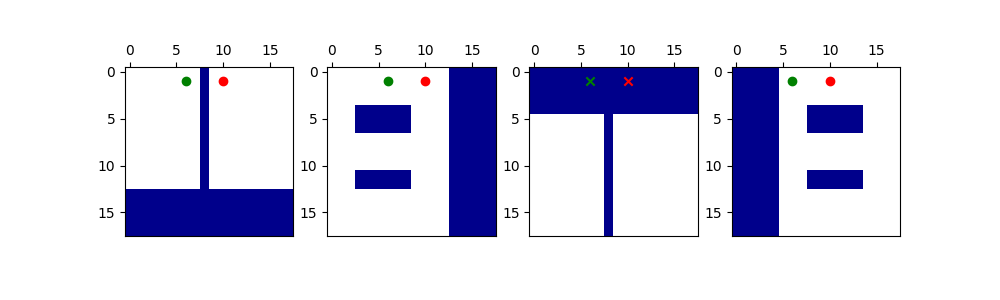

In [94]:
%matplotlib widget
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 3))
for rotation in range(4):      
    ax_occupancy_grid = fig.add_subplot(1, 4, rotation+1)
    plot_occupancy_grid(
        occupancy_grid=computational_space[rotation], 
        goal_point=goal_point, 
        plot_axis=ax_occupancy_grid, 
        start_point=start_point,
        plot_title="")
    
plt.show()


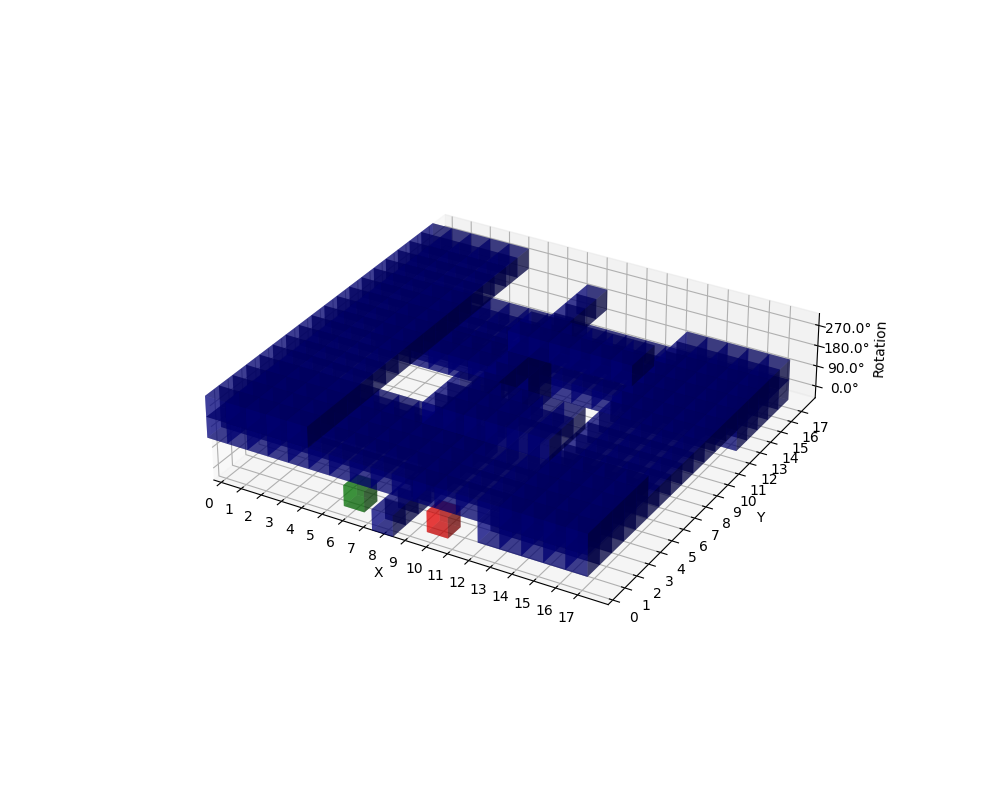

In [95]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_computational_space_3d(computational_space, ax, start_point=None, goal_point=None):
    rotation, size_y, size_x = computational_space.shape

    obstacle_color = 'darkblue'
    start_color = 'green'
    goal_color = 'red'

    for r in range(rotation):
        for y in range(size_y):
            for x in range(size_x):
                if not computational_space[r, y, x]:
                    # Plotte einen Würfel mit gleichen Abmessungen in allen Richtungen
                    ax.bar3d(x - 0.5, y - 0.5, r, 1, 1, 1, color=obstacle_color, alpha=0.5)

    if start_point is not None:
        start_x, start_y, start_rotation = start_point
        # Plotte einen Würfel für den Startpunkt
        ax.bar3d(start_x - 0.5, start_y - 0.5, start_rotation, 1, 1, 1, color=start_color, alpha=0.5)

    if goal_point is not None:
        goal_x, goal_y, goal_rotation = goal_point
        # Plotte einen Würfel für den Zielpunkt
        ax.bar3d(goal_x - 0.5, goal_y - 0.5, goal_rotation, 1, 1, 1, color=goal_color, alpha=0.5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Rotation')

    # Invertiere die Y-Achse
    ax.invert_yaxis()

    # Passe die Skalierung der Z-Achse manuell an
    ax.set_xlim(0, size_x)
    ax.set_ylim(0, size_y)
    ax.set_zlim(0, rotation)

    # Passe die Z-Koordinaten an, um die Würfel über der XY-Ebene zu positionieren
    ax.set_box_aspect([size_x / rotation, size_y / rotation, 1])

    # Passe die Position der Z-Ticks an
    ax.set_zticks(np.arange(0, rotation, 1) + 0.5)
    ax.set_zticklabels([f'{angle}°' for angle in np.arange(0, 360, 360/rotation)])

    # Passe die Position der X- und Y-Ticks an
    ax.set_xticks(np.arange(0, size_x, 1))
    ax.set_yticks(np.arange(0, size_y, 1))

    #ax.set_zticklabels([f'{angle}°' for angle in [0, 90, 180, 270]])



fig = plt.figure(figsize=(10, 8))
plot_axis = fig.add_subplot(111, projection='3d')
plot_computational_space_3d(
    computational_space=computational_space, 
    goal_point=goal_point,
    start_point=start_point,
    ax=plot_axis)
plt.show()

# Compute Wavefront Potentials

In [96]:
def wavefront_algorithm(cs_space, goal):
    rotation_size, size_y, size_x = cs_space.shape
    goal_x, goal_y, goal_rotation = goal

    total_potential = np.zeros_like(cs_space, dtype=float)  # initialize with 0s
    queue = [(goal_x, goal_y, goal_rotation, 2)]  # start with the goal
    visited = set([(goal_x, goal_y, goal_rotation)])

    while queue:
        current_x, current_y, current_rotation, current_potential = queue.pop(0)

        total_potential[current_rotation, current_y, current_x] = current_potential

        # Check neighbours in xy-boundary + not an obstacle + not visited
        for dr, dy, dx in [(0, -1, 0), (0, 1, 0), (0, 0, 1), (0, 0, -1), (-1, 0, 0), (1, 0, 0)]:
            next_rotation = (current_rotation + dr) % rotation_size
            next_y, next_x = current_y + dy, current_x + dx

            if 0 <= next_y < size_y and 0 <= next_x < size_x and \
               cs_space[next_rotation, next_y, next_x] and \
               total_potential[next_rotation, next_y, next_x] == 0 and \
               (next_x, next_y, next_rotation) not in visited:
                queue.append((next_x, next_y, next_rotation, current_potential + 1))
                visited.add((next_x, next_y, next_rotation))
        print(len(visited))


    return total_potential


In [98]:
import numpy as np
from collections import deque

def wavefront_algorithm_optimized(cs_space, goal):
    rotation_size, size_y, size_x = cs_space.shape
    goal_x, goal_y, goal_rotation = goal

    total_potential = np.zeros_like(cs_space, dtype=int)
    queue = deque([(goal_x, goal_y, goal_rotation)])

    while queue:
        current_x, current_y, current_rotation = queue.popleft()

        # Find minimum neighbor value using NumPy
        neighbors = [(0, -1, 0), (0, 1, 0), (0, 0, 1), (0, 0, -1), (-1, 0, 0), (1, 0, 0)]
        neighbor_values = [total_potential[(current_rotation + dr) % rotation_size, current_y + dy, current_x + dx]
                           for dr, dy, dx in neighbors
                           if 0 <= current_y + dy < size_y and 0 <= current_x + dx < size_x and
                           cs_space[(current_rotation + dr) % rotation_size, current_y + dy, current_x + dx]]
        min_neighbor_value = min(neighbor_values, default=0)

        # Set d(t) to 1 + min{d(t') | t' ∈ N(t), d(t') > 1}
        total_potential[current_rotation, current_y, current_x] = 1 + min_neighbor_value

        # Add all t' ∈ N(t) with d(t) = 0 to L (at the end)
        for dr, dy, dx in neighbors:
            next_rotation = (current_rotation + dr) % rotation_size
            next_y, next_x = current_y + dy, current_x + dx

            # Überprüfe, ob die Zelle noch nicht besucht wurde
            if 0 <= next_y < size_y and 0 <= next_x < size_x and \
               cs_space[next_rotation, next_y, next_x] and \
               total_potential[next_rotation, next_y, next_x] == 0 and \
               (next_x, next_y, next_rotation) not in visited:
                queue.append((next_x, next_y, next_rotation))
                visited.add((next_x, next_y, next_rotation))
        print(len(visited))
    return total_potential



total_potential = wavefront_algorithm(
    cs_space=computational_space, 
    goal=goal_point)

7
11
16
19
21
21
21
24
26
26
26
31
34
36
36
36
39
39
39
40
41
44
44
44
45
46
50
53
55
55
55
58
58
58
59
60
62
62
62
63
64
66
66
66
67
68
72
74
75
75
78
78
78
79
80
82
82
82
83
84
86
86
88
89
91
91
93
94
98
100
101
102
104
104
104
106
106
106
107
108
110
110
112
113
115
115
117
117
118
120
120
122
122
123
128
130
131
132
134
135
136
136
137
137
139
139
142
143
145
145
147
147
148
150
150
151
151
152
154
154
155
155
156
161
164
166
167
167
169
170
171
171
172
173
173
173
175
177
177
180
182
182
183
185
185
186
186
187
188
188
189
190
191
191
192
193
198
201
203
204
204
207
208
208
210
211
211
212
213
213
213
215
216
218
218
220
220
224
226
226
227
227
228
229
229
230
231
231
232
233
233
234
235
240
243
245
246
246
249
250
250
252
253
253
255
256
256
256
257
257
258
260
261
263
264
264
266
266
267
267
270
273
273
273
274
274
275
276
276
277
278
279
280
281
282
286
289
291
292
292
295
296
296
298
299
299
301
302
302
302
303
303
304
306
307
307
310
311
313
314
314
316
317
317
318
318
318
32

# Plot Wavefront Potential

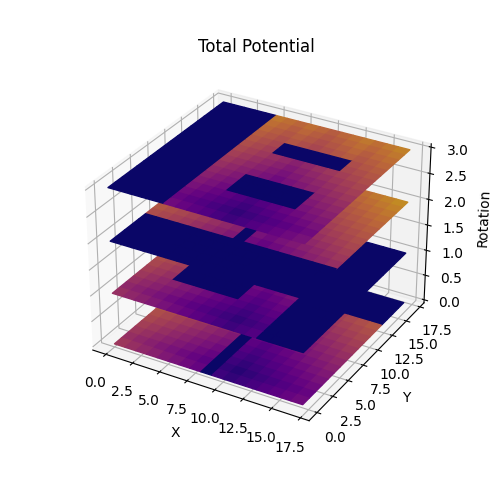

'\noccupancy_grid = add_obstacle(\n    occupancy_grid=occupancy_grid,\n    width=3,\n    length=1,\n    x=2,\n    y=3)\noccupancy_grid = add_obstacle(\n    occupancy_grid=occupancy_grid,\n    width=1,\n    length=3,\n    x=7,\n    y=7)\n'

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_3d_potential(potential, title, ax):
    rotation, size_y, size_x = potential.shape

    # Erzeuge ein Gitter im 3D-Raum
    x = np.arange(size_x)
    y = np.arange(size_y)
    X, Y = np.meshgrid(x, y)

    # Plotte die 3D-imshow für jede Rotationsebene
    for r in range(rotation):
        Z = np.full_like(X, r)  # Z-Koordinate auf Höhe der Rotationsebene
        ax.plot_surface(X, Y, Z, facecolors=plt.cm.plasma(potential[r, :, :]), rstride=1, cstride=1, alpha=1, antialiased=True)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Rotation')
    ax.set_title(title)
    #ax.invert_yaxis()

fig = plt.figure(figsize=(5, 5))
visualize_3d_potential(total_potential/np.max(total_potential), 'Total Potential', fig.add_subplot(111, projection='3d'))
plt.show()

'''
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=3,
    length=1,
    x=2,
    y=3)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=3,
    x=7,
    y=7)
'''

# Compute Force Field

In [108]:
def gradient_with_wraparound(array, axis):
    # Gradienten nur für die angegebene Achse berechnen
    gradient = np.gradient(array, axis=axis)

    # "Wrap-around" für die Gradienten implementieren
    if axis == 0:  # Z-Richtung
        gradient_wrapped = np.roll(gradient, shift=1, axis=axis)
    else:
        gradient_wrapped = gradient

    return gradient_wrapped

def compute_gradients2(total_potential):
    # Finde die Positionen der Hindernisse (np.nan)
    obstacles = np.isnan(total_potential)

    # Berechne die Gradienten unter Berücksichtigung der Hindernisse
    gradient_z = gradient_with_wraparound(total_potential, axis=0)
    gradient_y, gradient_x = np.gradient(total_potential, axis=(1, 2))

    # Setze Gradienten für Hindernisse auf 0
    gradient_z[obstacles] = 0
    gradient_y[obstacles] = 0
    gradient_x[obstacles] = 0

    # Die negierten Gradienten repräsentieren die Kräfte
    force_field_x = -gradient_x
    force_field_y = -gradient_y
    force_field_rotation = -gradient_z

    return force_field_x, force_field_y, force_field_rotation

In [110]:
def compute_gradients3(total_potential):
    # Kopiere die erste und letzte Ebene
    first_layer = total_potential[0, :, :]
    last_layer = total_potential[-1, :, :]

    # Füge die kopierten Ebenen oben und unten an
    total_potential = np.concatenate([last_layer[np.newaxis, :, :], total_potential, first_layer[np.newaxis, :, :]], axis=0)

    # Berechne die Gradienten unter Berücksichtigung der erweiterten Ebenen
    gradient_z, gradient_y, gradient_x = np.gradient(total_potential)

    # Die negierten Gradienten repräsentieren die Kräfte
    force_field_x = -gradient_x[1:-1, :, :]
    force_field_y = -gradient_y[1:-1, :, :]
    force_field_rotation = -gradient_z[1:-1, :, :]

    return force_field_x, force_field_y, force_field_rotation

In [255]:
def compute_gradients4(total_potential, goal_point):

    obstacles = np.isnan(total_potential)

    # Kopiere die erste und letzte Ebene
    first_layer = total_potential[0, :, :]
    last_layer = total_potential[-1, :, :]

    # Füge die kopierten Ebenen oben und unten an
    total_potential_z_padded = np.concatenate([last_layer[np.newaxis, :, :], total_potential, first_layer[np.newaxis, :, :]], axis=0)

    # Berechne die Gradienten unter Berücksichtigung der erweiterten Ebenen
    gradient_z, gradient_y, gradient_x = np.gradient(total_potential_z_padded)

    # Die negierten Gradienten repräsentieren die Kräfte
    force_field_x = -gradient_x[1:-1, :, :]
    force_field_y = -gradient_y[1:-1, :, :]
    force_field_rotation = -gradient_z[1:-1, :, :]

    # Setze Gradienten für Hindernisse auf 0
    force_field_x[obstacles] = 0
    force_field_y[obstacles] = 0
    force_field_rotation[obstacles] = 0
    
    # Ersetze NaN-Gradienten durch manuell berechneten Gradienten
    nan_coordinates_x = np.argwhere(np.isnan(force_field_x))
    for z, y, x in nan_coordinates_x:
        if np.isnan(total_potential[z, y, x-1]) and not np.isnan(total_potential[z, y, x+1]):
            # x is at "left border"
            gradient_manual_x = total_potential[z, y, x+1] - total_potential[z, y, x]
            force_field_x[z, y, x] = -gradient_manual_x if gradient_manual_x <= 0 else 0
        elif np.isnan(total_potential[z, y, x+1]) and not np.isnan(total_potential[z, y, x-1]):
            # x is at "right border"
            gradient_manual_x = total_potential[z, y, x] - total_potential[z, y, x-1]
            force_field_x[z, y, x] = -gradient_manual_x if gradient_manual_x >= 0 else 0
        else:
            gradient_manual_x = 0
        
    nan_coordinates_y = np.argwhere(np.isnan(force_field_y))
    for z, y, x in nan_coordinates_y:
        if np.isnan(total_potential[z, y-1, x]) and not np.isnan(total_potential[z, y+1, x]):
            # y is at "top border"
            gradient_manual_y = total_potential[z, y+1, x] - total_potential[z, y, x]
            force_field_y[z, y, x] = gradient_manual_y if gradient_manual_y <= 0 else 0
        elif np.isnan(total_potential[z, y+1, x]) and not np.isnan(total_potential[z, y-1, x]):
            # y is at "bottom border"
            gradient_manual_y = total_potential[z, y, x] - total_potential[z, y-1, x]
            force_field_y[z, y, x] = gradient_manual_y if gradient_manual_y >= 0 else 0
        else:
            gradient_manual_y = 0
            
    nan_coordinates_rotation = np.argwhere(np.isnan(force_field_rotation))
    for z, y, x in nan_coordinates_rotation:
        if np.isnan(total_potential[(z+1) % 4, y, x]) and not np.isnan(total_potential[(z-1) % 4, y, x]):
            # z is at "upper border"
            gradient_manual_z = total_potential[z, y, x] - total_potential[(z-1) % 4, y, x] # caution!
            gradient_manual_z = gradient_manual_z if gradient_manual_z >= 0 else 0  # caution!
        elif np.isnan(total_potential[(z-1) % 4, y, x]) and not np.isnan(total_potential[(z+1) % 4, y, x]):
            # z is at "lower border"
            gradient_manual_z = total_potential[(z+1) % 4, y, x] - total_potential[z, y, x]
            gradient_manual_z = gradient_manual_z if gradient_manual_z <= 0 else 0
        else:
            gradient_manual_z = 0
        force_field_rotation[z, y, x] = -gradient_manual_z
    
    local_minima_coordinates = np.argwhere((force_field_x == 0) & (force_field_y == 0) & (force_field_rotation == 0) & ~obstacles)
    
    goal_x, goal_y, goal_rotation = goal_point

    for z, y, x in local_minima_coordinates:
        if x != goal_x or y != goal_y or z != goal_rotation:
            if total_potential[z, y, x-1] == total_potential[z, y, x+1]:
                gradient_local_min_x = total_potential[z, y, x+1] - total_potential[z, y, x]
                force_field_x[z, y, x] = -gradient_local_min_x
            if total_potential[z, y-1, x] == total_potential[z, y+1, x]:
                print(total_potential[z, y-1, x], total_potential[z, y+1, x])
                gradient_local_min_y = total_potential[z, y+1, x] - total_potential[z, y, x]
                force_field_y[z, y, x] = -gradient_local_min_y
            if total_potential[(z+1) % 4, y, x] == total_potential[(z-1) % 4, y, x]:
                gradient_local_min_z = total_potential[(z+1) % 4, y, x] - total_potential[z, y, x]
                force_field_rotation[z, y, x] = -gradient_local_min_z

    return force_field_x, force_field_y, force_field_rotation

# Plot Force Vectors

8.0 8.0


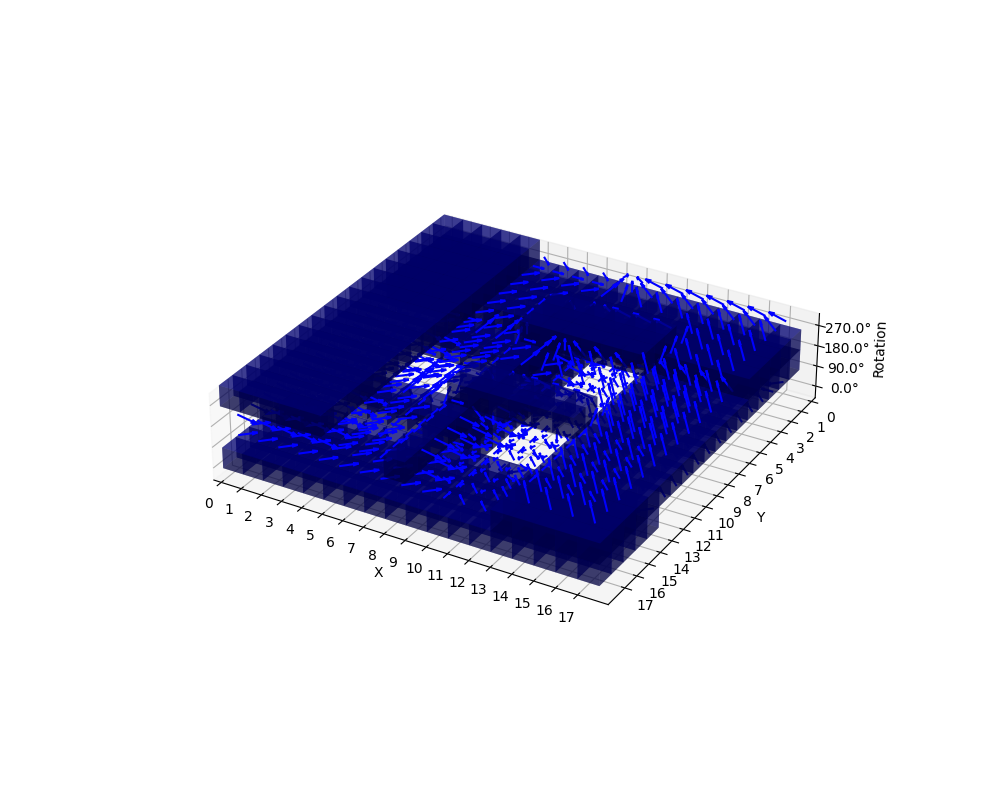

In [256]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_space_and_forces(computational_space, ax, force_field_x=None, force_field_y=None, force_field_rotation=None, start_point=None, goal_point=None):
    rotation, size_y, size_x = computational_space.shape

    obstacle_color = 'darkblue'
    start_color = 'green'
    goal_color = 'red'
    
    if force_field_x is not None and force_field_y is not None and force_field_rotation is not None:
        max_force = np.max(np.sqrt(force_field_x**2 + force_field_y**2 + force_field_rotation**2))

    for r in range(rotation):
        for y in range(size_y):
            for x in range(size_x):
                if not computational_space[r, y, x]:
                    # Plotte einen Würfel mit gleichen Abmessungen in allen Richtungen
                    ax.bar3d(x - 0.5, y - 0.5, r, 1, 1, 1, color=obstacle_color, alpha=0.5)
                else:
                    if force_field_x is not None and force_field_y is not None and force_field_rotation is not None:
                        # Berechne die Länge des Kraftvektors für diesen Punkt
                        force_length = np.sqrt(force_field_x[r, y, x]**2 + force_field_y[r, y, x]**2 + force_field_rotation[r, y, x]**2)
                        # Normalisiere den Kraftvektor auf den Bereich [0, 1]
                        length = force_length / max_force if max_force != 0 else 0
                        plot_axis.quiver(x, y, r + 0.5, force_field_x[r, y, x], force_field_y[r, y, x], force_field_rotation[r, y, x],
                                color='blue', length=length, normalize=True)

    if start_point is not None:
        start_x, start_y, start_rotation = start_point
        # Plotte einen Würfel für den Startpunkt
        ax.bar3d(start_x - 0.5, start_y - 0.5, start_rotation, 1, 1, 1, color=start_color, alpha=0.5)

    if goal_point is not None:
        goal_x, goal_y, goal_rotation = goal_point
        # Plotte einen Würfel für den Zielpunkt
        ax.bar3d(goal_x - 0.5, goal_y - 0.5, goal_rotation, 1, 1, 1, color=goal_color, alpha=0.5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Rotation')

    # Invertiere die Y-Achse
    ax.invert_yaxis()

    # Passe die Skalierung der Z-Achse manuell an
    ax.set_xlim(0, size_x)
    ax.set_ylim(0, size_y)
    ax.set_zlim(0, rotation)

    # Passe die Z-Koordinaten an, um die Würfel über der XY-Ebene zu positionieren
    ax.set_box_aspect([size_x / rotation, size_y / rotation, 1])

    # Passe die Position der Z-Ticks an
    ax.set_zticks(np.arange(0, rotation, 1) + 0.5)
    ax.set_zticklabels([f'{angle}°' for angle in np.arange(0, 360, 360/rotation)])

    # Passe die Position der X- und Y-Ticks an
    ax.set_xticks(np.arange(0, size_x, 1))
    ax.set_yticks(np.arange(0, size_y, 1))
    ax.invert_yaxis()

    #ax.set_zticklabels([f'{angle}°' for angle in [0, 90, 180, 270]])

total_potential[~computational_space] = np.nan

force_field_x, force_field_y, force_field_rotation = compute_gradients4(total_potential, goal_point)

total_potential[~computational_space] = 0
force_field_x[~computational_space] = 0
force_field_y[~computational_space] = 0
force_field_rotation[~computational_space] = 0

fig = plt.figure(figsize=(10, 8))
plot_axis = fig.add_subplot(111, projection='3d')
visualize_space_and_forces(
    computational_space=computational_space, 
    force_field_x=force_field_x, 
    force_field_y=force_field_y, 
    force_field_rotation=force_field_rotation, 
    goal_point=goal_point, 
    ax=plot_axis)
plt.show()

In [233]:
print(force_field_x[0][1][7],force_field_y[1][1][7], force_field_rotation[3][1][7])
 #0  1  7
print(total_potential[3][1][7], total_potential[0][1][7], total_potential[3][1][7])

0.0 -0.0 0.0
6.0 7.0 6.0


In [124]:
force_field_rotation[0][12][0]

nan

In [127]:
def find_nan_coordinates(array):
    nan_coordinates = []

    # Iteriere durch das 3D-Array und sammle Koordinaten der np.nan-Werte
    for y, row in enumerate(array[3]):
        for x, value in enumerate(row):
            if np.isnan(value):
                nan_coordinates.append((x,y,3))

    return nan_coordinates

find_nan_coordinates(force_field_y)

[(8, 3, 3),
 (9, 3, 3),
 (10, 3, 3),
 (11, 3, 3),
 (12, 3, 3),
 (13, 3, 3),
 (8, 7, 3),
 (9, 7, 3),
 (10, 7, 3),
 (11, 7, 3),
 (12, 7, 3),
 (13, 7, 3),
 (8, 10, 3),
 (9, 10, 3),
 (10, 10, 3),
 (11, 10, 3),
 (12, 10, 3),
 (13, 10, 3),
 (8, 13, 3),
 (9, 13, 3),
 (10, 13, 3),
 (11, 13, 3),
 (12, 13, 3),
 (13, 13, 3)]

# Gradient Descent Step

In [44]:
def gradient_descent(current_position, force_field_x, force_field_y, force_field_rotation, path):
    x, y, rotation = current_position

    force_x = force_field_x[rotation, y, x]
    force_y = force_field_y[rotation, y, x]
    force_rotation = force_field_rotation[rotation, y, x]

    # Füge die aktuelle Position zum Pfad hinzu
    path.append((x, y, rotation))

    possible_moves = []

    if abs(force_x) != 0 and abs(force_x) >= abs(force_y) and abs(force_x) >= abs(force_rotation):
        new_x = x + 1 if force_x > 0 else x - 1
        possible_moves.append((new_x, y, rotation))
    
    if abs(force_y) != 0 and abs(force_y) >= abs(force_x) and abs(force_y) >= abs(force_rotation):
        new_y = y + 1 if force_y > 0 else y - 1
        possible_moves.append((x, new_y, rotation))
    
    if abs(force_rotation) != 0 and abs(force_rotation) >= abs(force_x) and abs(force_rotation) >= abs(force_y):
        new_rotation = (rotation + 1) % len(force_field_rotation) if force_rotation > 0 else (rotation - 1) % len(force_field_rotation)
        possible_moves.append((x, y, new_rotation))

    # Überprüfe, ob die neue Position bereits im Pfad enthalten ist
    valid_moves = [move for move in possible_moves if move not in path]

    if valid_moves:
        return max(valid_moves, key=lambda move: abs(force_field_x[move[2], move[1], move[0]]) + abs(force_field_y[move[2], move[1], move[0]]) + abs(force_field_rotation[move[2], move[1], move[0]]))
    else:
        raise Exception("Local Mininum at x=" + str(x) + ", y=" + str(y) + ", z=" + str(rotation))

# Visualize

<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>
(6, 1, 0)


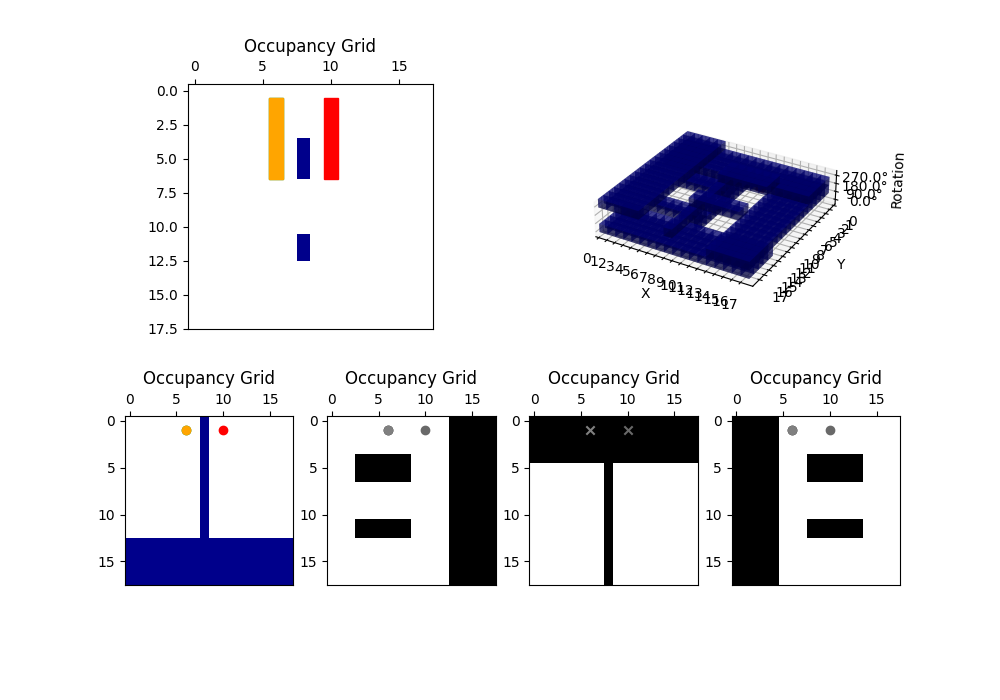

Force_x: 1.0
Force_y: 0.0
Force_rotation: 0.0
Force_x: 0.0
Force_y: 1.0
Force_rotation: 1.0
Force_x: 1.0
Force_y: 0.0
Force_rotation: 0.0
Force_x: 1.0
Force_y: 0.0
Force_rotation: 0.0
Force_x: 1.0
Force_y: 0.0
Force_rotation: 1.0
Force_x: 1.0
Force_y: 0.0
Force_rotation: 0.0


In [252]:
fig = plt.figure(figsize=(10, 7))

ax_occupancy_grid = fig.add_subplot(2, 4, (1,2))
ax_cs_3D_force_vetors = fig.add_subplot(2, 4, (3,4), projection='3d')

ax_cs_2D = [fig.add_subplot(2, 4, 5), fig.add_subplot(2, 4, 6), fig.add_subplot(2, 4, 7), fig.add_subplot(2, 4, 8)]

def on_key(event):
    global current_position, path
    current_position = gradient_descent(
                        current_position=current_position,
                        force_field_x=force_field_x,
                        force_field_y=force_field_y,
                        force_field_rotation=force_field_rotation)  
    
    visualize_space_and_forces(
        computational_space=computational_space, 
        force_field_x=force_field_x, 
        force_field_y=force_field_y, 
        force_field_rotation=force_field_rotation, 
        goal_point=goal_point, 
        ax=ax_cs_3D_force_vetors)
    plot_occupancy_grid(
        occupancy_grid=occupancy_grid,
        start_point=start_point,
        goal_point=goal_point,
        current_position=current_position,
        robot_width=robot_width,
        robot_length=robot_length,
        plot_axis=ax_occupancy_grid
    )
    for rotation in range(4):
        
        plot_occupancy_grid(
            occupancy_grid=computational_space[rotation],
            start_point=start_point,
            goal_point=goal_point,
            current_position=current_position,
            plot_axis=ax_cs_2D[rotation],
            active = current_position[2] == rotation
    )

    # path.append(tuple(current_position))
    plt.draw()
    
visualize_space_and_forces(
    computational_space=computational_space, 
    force_field_x=force_field_x, 
    force_field_y=force_field_y, 
    force_field_rotation=force_field_rotation, 
    goal_point=goal_point, 
    ax=ax_cs_3D_force_vetors)
plot_occupancy_grid(
    occupancy_grid=occupancy_grid,
    start_point=start_point,
    goal_point=goal_point,
    current_position=current_position,
    robot_width=robot_width,
    robot_length=robot_length,
    plot_axis=ax_occupancy_grid
)
for rotation in range(4):
    plot_occupancy_grid(
    occupancy_grid=computational_space[rotation],
    start_point=start_point,
    goal_point=goal_point,
    current_position=current_position,
    plot_axis=ax_cs_2D[rotation],
    active = current_position[2] == rotation
)
print(current_position)


# Verbinde die Tasten mit der Funktion on_key
fig.canvas.mpl_connect('key_press_event', on_key)

plt.show()